In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('classify_3.csv',encoding="gbk")

In [3]:
data.head()

,date,time,日前电价,直调负荷,联络线受电负荷,风电负荷,光伏总加,自备机组总加,地方电厂发电总加,直调公用,正备用,负备用,quarter
0,2022/1/1,0:15,279.0,60624.3,10030.0,8817.99,0.0,4815,8140,36961.31,18392.6,8051.86,1
1,2022/1/1,0:30,277.0,60527.7,9443.0,8895.40,0.0,4815,8140,37374.30,17979.7,8464.77,2
2,2022/1/1,0:45,277.4,59883.2,9206.0,8969.26,0.0,4815,8140,36892.94,18461.1,7983.40,3
3,2022/1/1,1:00,276.0,59625.4,8969.0,9038.97,0.0,4815,8140,36802.43,18551.6,7892.89,4
4,2022/1/1,1:15,275.0,59367.6,8732.0,9104.96,0.0,4815,8140,36715.64,18638.4,7806.09,5


In [4]:
f1 = data['日前电价']
f2 = data['直调负荷']
f3 = data['联络线受电负荷']
f4 = data['风电负荷']
f5 = data['光伏总加']
f6 = data['直调公用']
f7 = data['正备用']
f8 = data['负备用']
f9 = data['quarter']

In [5]:
length=len(f1)#给定变量值
lookBack = 7*96
pred_num = 1
train_num = length-lookBack-pred_num+1
train_size = 62*96
valid_size = 10*96
test_size = 4*96
size=train_size+valid_size

In [6]:
def createSamples_X(dataset, lookBack, pred_num,day):#取前n天对应点的电价数据
    dataX = np.zeros((1,day)) 
    for i in range(len(dataset)-lookBack-pred_num+1):
        sample = []
        for j in range(day):
            sample_X = dataset[(i+j*96):(i+j*96+1), :]
            sample.append(sample_X)
        sample = np.array(sample).reshape(1,-1)
        dataX = np.vstack((dataX,sample)) 
    dataX = dataX[1:(len(dataset)-lookBack-pred_num+2), :]
    dataX = np.array(dataX)
    dataX = np.reshape(dataX, (dataX.shape[0], dataX.shape[1])) #三维到二维
    return dataX

In [7]:
#取目标值Y或取当点特征
def createSamples_Y(dataset, lookBack, pred_num):
    dataY = []
    for i in range(len(dataset)-lookBack-pred_num+1):
        sample_Y = dataset[(i+lookBack):(i + lookBack+pred_num), :]
        dataY.append(sample_Y)
    dataY = np.array(dataY)  # (N, 1)
    dataY = np.reshape(dataY, (dataY.shape[0], dataY.shape[1]))
    return dataY

In [8]:
#取连续特征值
def createSamples_continuous(dataset, lookBack, pred_num,front, lenthh):
    dataX = []
    for i in range(len(dataset)-lookBack-pred_num+1):
        sample_X = dataset[(i+front):(i+front+lenthh), :]
        dataX.append(sample_X)
    dataX = np.array(dataX)
    dataX = np.reshape(dataX, (dataX.shape[0], dataX.shape[1]))
    return dataX

In [9]:
#划分特征与目标
traffic_target = createSamples_Y(f1.values.reshape(-1, 1), lookBack, pred_num)
traffic_feature_2 = createSamples_Y(f2.values.reshape(-1, 1),lookBack, pred_num) 
traffic_feature_3 = createSamples_Y(f3.values.reshape(-1, 1),lookBack, pred_num)
traffic_feature_4 = createSamples_continuous(f4.values.reshape(-1, 1),lookBack, pred_num,lookBack-16,17) 
traffic_feature_5 = createSamples_continuous(f5.values.reshape(-1, 1),lookBack, pred_num,lookBack-16,17)  
traffic_feature_6 = createSamples_continuous(f6.values.reshape(-1, 1),lookBack, pred_num,lookBack-16,17)
traffic_feature_7 = createSamples_continuous(f7.values.reshape(-1, 1),lookBack, pred_num,lookBack-16,17)
traffic_feature_8 = createSamples_continuous(f8.values.reshape(-1, 1),lookBack, pred_num,lookBack-16,17)
traffic_feature_9 = createSamples_Y(f9.values.reshape(-1, 1),lookBack, pred_num)

traffic_feature_1 = createSamples_X(f1.values.reshape(-1, 1),lookBack, pred_num,6)
traffic_feature_10 = createSamples_continuous(f1.values.reshape(-1, 1),lookBack, pred_num,lookBack-16-96*3,17) 



traffic_feature = np.hstack((traffic_feature_1,traffic_feature_2,traffic_feature_3,traffic_feature_4,
                             traffic_feature_5,traffic_feature_6,traffic_feature_7,traffic_feature_8,
                             traffic_feature_9,traffic_feature_10                          
                            ))


In [10]:
#训练、验证、测试集
y_train = traffic_target[0:train_size,:]
y_valid = traffic_target[train_size:size,:]
y_test = traffic_target[size:train_num,:]
X_train=traffic_feature[0:train_size,:]
X_valid=traffic_feature[train_size:size,:]
X_test=traffic_feature[size:train_num,:]

y_train,y_valid,y_test,X_train,X_valid,X_test

(array([[311.  ],
        [294.  ],
        [277.38],
        ...,
        [682.56],
        [666.8 ],
        [649.56]]),
 array([[324.89],
        [327.51],
        [330.  ],
        [329.24],
        [330.55],
        [330.72],
        [330.49],
        [329.55],
        [330.  ],
        [328.95],
        [329.13],
        [327.72],
        [326.91],
        [326.91],
        [325.98],
        [325.03],
        [327.47],
        [328.98],
        [330.68],
        [333.76],
        [340.9 ],
        [351.22],
        [378.  ],
        [382.4 ],
        [382.  ],
        [404.63],
        [439.15],
        [388.22],
        [338.98],
        [333.59],
        [332.6 ],
        [326.72],
        [326.69],
        [317.49],
        [308.07],
        [300.34],
        [282.  ],
        [220.  ],
        [173.  ],
        [139.  ],
        [113.  ],
        [ 95.34],
        [ 70.57],
        [ 68.59],
        [ 88.36],
        [ 70.  ],
        [-80.  ],
        [-80.  ],
        [-80.

In [11]:
#自定义评价函数
def myFeval(preds, xgbtrain):
    label = xgbtrain.get_label()
    score = mean_squared_error(label,preds)
    return 'myFeval',score

In [13]:
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, RepeatedKFold
from scipy import sparse
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)
from datetime import datetime

In [15]:
##### xgb，'silent': True,

xgb_params = {"booster":'gbtree','eta': 0.005, 'max_depth': 5, 'subsample': 0.7, 
              'colsample_bytree': 0.8, 'objective': 'reg:linear', 'eval_metric': 'rmse',  'nthread': 8}
folds = KFold(n_splits=5, shuffle=True, random_state=2018)
oof_xgb = np.zeros(len(X_train))
predictions_xgb = np.zeros(len(X_test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print("fold n°{}".format(fold_+1))
    trn_data = xgb.DMatrix(X_train[trn_idx], y_train[trn_idx])
    val_data = xgb.DMatrix(X_train[val_idx], y_train[val_idx])
    
    watchlist = [(trn_data, 'X_train'), (val_data, 'X_valid')]
    clf = xgb.train(dtrain=trn_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=100, params=xgb_params,feval = myFeval)
    oof_xgb[val_idx] = clf.predict(xgb.DMatrix(X_train[val_idx]), ntree_limit=clf.best_ntree_limit)
    predictions_xgb += clf.predict(xgb.DMatrix(X_test), ntree_limit=clf.best_ntree_limit) / folds.n_splits
    
print("CV score: {:<8.8f}".format(mean_squared_error(oof_xgb, y_train)))

fold n°1
[23:56:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	X_train-rmse:397.07019	X_train-myFeval:157664.76562	X_valid-rmse:397.01529	X_valid-myFeval:157621.17188
[100]	X_train-rmse:253.78987	X_train-myFeval:64409.28516	X_valid-rmse:255.42157	X_valid-myFeval:65240.17969
[200]	X_train-rmse:169.57262	X_train-myFeval:28754.87305	X_valid-rmse:172.61824	X_valid-myFeval:29797.05859
[300]	X_train-rmse:121.59435	X_train-myFeval:14785.18945	X_valid-rmse:126.42436	X_valid-myFeval:15983.11719
[400]	X_train-rmse:94.70761	X_train-myFeval:8969.53027	X_valid-rmse:101.48634	X_valid-myFeval:10299.47949
[500]	X_train-rmse:79.47930	X_train-myFeval:6316.95947	X_valid-rmse:88.09963	X_valid-myFeval:7761.54492
[600]	X_train-rmse:70.24219	X_train-myFeval:4933.96582	X_valid-rmse:80.32447	X_valid-myFeval:6452.02100
[700]	X_train-rmse:64.18883	X_train-myFeval:4120.20654	X_valid-rmse:

[7700]	X_train-rmse:10.86225	X_train-myFeval:117.98847	X_valid-rmse:42.02082	X_valid-myFeval:1765.74890
[7800]	X_train-rmse:10.68562	X_train-myFeval:114.18247	X_valid-rmse:41.93566	X_valid-myFeval:1758.59924
[7900]	X_train-rmse:10.51053	X_train-myFeval:110.47133	X_valid-rmse:41.86195	X_valid-myFeval:1752.42273
[8000]	X_train-rmse:10.34024	X_train-myFeval:106.92052	X_valid-rmse:41.78939	X_valid-myFeval:1746.35327
[8100]	X_train-rmse:10.16679	X_train-myFeval:103.36371	X_valid-rmse:41.70451	X_valid-myFeval:1739.26599
[8200]	X_train-rmse:9.99974	X_train-myFeval:99.99483	X_valid-rmse:41.63419	X_valid-myFeval:1733.40613
[8300]	X_train-rmse:9.83856	X_train-myFeval:96.79722	X_valid-rmse:41.57084	X_valid-myFeval:1728.13440
[8400]	X_train-rmse:9.67338	X_train-myFeval:93.57439	X_valid-rmse:41.49977	X_valid-myFeval:1722.23096
[8500]	X_train-rmse:9.52254	X_train-myFeval:90.67885	X_valid-rmse:41.42946	X_valid-myFeval:1716.40027
[8600]	X_train-rmse:9.36791	X_train-myFeval:87.75774	X_valid-rmse:41.361

[15700]	X_train-rmse:3.51105	X_train-myFeval:12.32743	X_valid-rmse:39.18949	X_valid-myFeval:1535.81616
[15800]	X_train-rmse:3.46632	X_train-myFeval:12.01538	X_valid-rmse:39.17553	X_valid-myFeval:1534.72168
[15900]	X_train-rmse:3.42648	X_train-myFeval:11.74077	X_valid-rmse:39.16185	X_valid-myFeval:1533.65076
[16000]	X_train-rmse:3.38630	X_train-myFeval:11.46705	X_valid-rmse:39.15028	X_valid-myFeval:1532.74438
[16100]	X_train-rmse:3.34409	X_train-myFeval:11.18290	X_valid-rmse:39.13770	X_valid-myFeval:1531.75891
[16200]	X_train-rmse:3.30641	X_train-myFeval:10.93232	X_valid-rmse:39.12676	X_valid-myFeval:1530.90283
[16300]	X_train-rmse:3.26888	X_train-myFeval:10.68557	X_valid-rmse:39.11481	X_valid-myFeval:1529.96790
[16400]	X_train-rmse:3.22879	X_train-myFeval:10.42511	X_valid-rmse:39.10310	X_valid-myFeval:1529.05273
[16500]	X_train-rmse:3.19207	X_train-myFeval:10.18930	X_valid-rmse:39.09218	X_valid-myFeval:1528.19836
[16600]	X_train-rmse:3.15192	X_train-myFeval:9.93462	X_valid-rmse:39.0786

D:\Application\Anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


fold n°2
[00:09:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	X_train-rmse:398.04462	X_train-myFeval:158439.53125	X_valid-rmse:393.12988	X_valid-myFeval:154551.12500
[100]	X_train-rmse:254.48631	X_train-myFeval:64763.26953	X_valid-rmse:251.02660	X_valid-myFeval:63014.35547
[200]	X_train-rmse:170.01910	X_train-myFeval:28906.49219	X_valid-rmse:168.72624	X_valid-myFeval:28468.54688
[300]	X_train-rmse:121.68109	X_train-myFeval:14806.29102	X_valid-rmse:123.14675	X_valid-myFeval:15165.12305
[400]	X_train-rmse:94.58312	X_train-myFeval:8945.96875	X_valid-rmse:98.90248	X_valid-myFeval:9781.70312
[500]	X_train-rmse:79.32413	X_train-myFeval:6292.31836	X_valid-rmse:86.23860	X_valid-myFeval:7437.09668
[600]	X_train-rmse:69.95553	X_train-myFeval:4893.77539	X_valid-rmse:79.16634	X_valid-myFeval:6267.30811
[700]	X_train-rmse:63.94765	X_train-myFeval:4089.30273	X_valid-rmse:75

[7700]	X_train-rmse:10.83292	X_train-myFeval:117.35212	X_valid-rmse:43.42688	X_valid-myFeval:1885.89416
[7800]	X_train-rmse:10.64985	X_train-myFeval:113.41937	X_valid-rmse:43.35102	X_valid-myFeval:1879.31152
[7900]	X_train-rmse:10.47411	X_train-myFeval:109.70697	X_valid-rmse:43.27804	X_valid-myFeval:1872.98840
[8000]	X_train-rmse:10.29653	X_train-myFeval:106.01845	X_valid-rmse:43.20316	X_valid-myFeval:1866.51282
[8100]	X_train-rmse:10.12304	X_train-myFeval:102.47593	X_valid-rmse:43.13150	X_valid-myFeval:1860.32703
[8200]	X_train-rmse:9.95915	X_train-myFeval:99.18471	X_valid-rmse:43.07008	X_valid-myFeval:1855.03210
[8300]	X_train-rmse:9.80256	X_train-myFeval:96.09019	X_valid-rmse:43.00532	X_valid-myFeval:1849.45801
[8400]	X_train-rmse:9.63540	X_train-myFeval:92.84087	X_valid-rmse:42.93380	X_valid-myFeval:1843.31177
[8500]	X_train-rmse:9.47948	X_train-myFeval:89.86056	X_valid-rmse:42.86912	X_valid-myFeval:1837.76111
[8600]	X_train-rmse:9.33152	X_train-myFeval:87.07736	X_valid-rmse:42.807

[15700]	X_train-rmse:3.44865	X_train-myFeval:11.89318	X_valid-rmse:40.82106	X_valid-myFeval:1666.35864
[15800]	X_train-rmse:3.40479	X_train-myFeval:11.59262	X_valid-rmse:40.80799	X_valid-myFeval:1665.29224
[15900]	X_train-rmse:3.36441	X_train-myFeval:11.31926	X_valid-rmse:40.79853	X_valid-myFeval:1664.51965
[16000]	X_train-rmse:3.32142	X_train-myFeval:11.03181	X_valid-rmse:40.78464	X_valid-myFeval:1663.38696
[16100]	X_train-rmse:3.27946	X_train-myFeval:10.75483	X_valid-rmse:40.77435	X_valid-myFeval:1662.54822
[16200]	X_train-rmse:3.23925	X_train-myFeval:10.49276	X_valid-rmse:40.76435	X_valid-myFeval:1661.73279
[16300]	X_train-rmse:3.19957	X_train-myFeval:10.23725	X_valid-rmse:40.75422	X_valid-myFeval:1660.90662
[16400]	X_train-rmse:3.15937	X_train-myFeval:9.98165	X_valid-rmse:40.74371	X_valid-myFeval:1660.04956
[16500]	X_train-rmse:3.12097	X_train-myFeval:9.74045	X_valid-rmse:40.73352	X_valid-myFeval:1659.21924
[16600]	X_train-rmse:3.08275	X_train-myFeval:9.50336	X_valid-rmse:40.72564	

D:\Application\Anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


fold n°3
[00:21:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	X_train-rmse:396.38620	X_train-myFeval:157122.04688	X_valid-rmse:399.71484	X_valid-myFeval:159771.96875
[100]	X_train-rmse:253.19871	X_train-myFeval:64109.57422	X_valid-rmse:255.87784	X_valid-myFeval:65473.46484
[200]	X_train-rmse:169.00092	X_train-myFeval:28561.31055	X_valid-rmse:172.76135	X_valid-myFeval:29846.48828
[300]	X_train-rmse:120.99600	X_train-myFeval:14640.03320	X_valid-rmse:126.95087	X_valid-myFeval:16116.52637
[400]	X_train-rmse:94.06058	X_train-myFeval:8847.39356	X_valid-rmse:102.64463	X_valid-myFeval:10535.92090
[500]	X_train-rmse:78.92929	X_train-myFeval:6229.83447	X_valid-rmse:89.88578	X_valid-myFeval:8079.45361
[600]	X_train-rmse:69.72172	X_train-myFeval:4861.11719	X_valid-rmse:82.69070	X_valid-myFeval:6837.75391
[700]	X_train-rmse:63.54876	X_train-myFeval:4038.44385	X_valid-rmse:

[7700]	X_train-rmse:10.94709	X_train-myFeval:119.83885	X_valid-rmse:44.54281	X_valid-myFeval:1984.06213
[7800]	X_train-rmse:10.75487	X_train-myFeval:115.66733	X_valid-rmse:44.46692	X_valid-myFeval:1977.30688
[7900]	X_train-rmse:10.58313	X_train-myFeval:112.00255	X_valid-rmse:44.38781	X_valid-myFeval:1970.27820
[8000]	X_train-rmse:10.39708	X_train-myFeval:108.09937	X_valid-rmse:44.30660	X_valid-myFeval:1963.07459
[8100]	X_train-rmse:10.22965	X_train-myFeval:104.64570	X_valid-rmse:44.24238	X_valid-myFeval:1957.38806
[8200]	X_train-rmse:10.06034	X_train-myFeval:101.21053	X_valid-rmse:44.17253	X_valid-myFeval:1951.21216
[8300]	X_train-rmse:9.87687	X_train-myFeval:97.55250	X_valid-rmse:44.09823	X_valid-myFeval:1944.65417
[8400]	X_train-rmse:9.72173	X_train-myFeval:94.51204	X_valid-rmse:44.02985	X_valid-myFeval:1938.62769
[8500]	X_train-rmse:9.56551	X_train-myFeval:91.49904	X_valid-rmse:43.96792	X_valid-myFeval:1933.17835
[8600]	X_train-rmse:9.40952	X_train-myFeval:88.53910	X_valid-rmse:43.9

[15700]	X_train-rmse:3.44159	X_train-myFeval:11.84455	X_valid-rmse:41.78858	X_valid-myFeval:1746.28577
[15800]	X_train-rmse:3.39915	X_train-myFeval:11.55423	X_valid-rmse:41.77741	X_valid-myFeval:1745.35254
[15900]	X_train-rmse:3.35759	X_train-myFeval:11.27341	X_valid-rmse:41.76437	X_valid-myFeval:1744.26257
[16000]	X_train-rmse:3.31591	X_train-myFeval:10.99523	X_valid-rmse:41.75261	X_valid-myFeval:1743.27991
[16100]	X_train-rmse:3.27362	X_train-myFeval:10.71659	X_valid-rmse:41.74055	X_valid-myFeval:1742.27368
[16200]	X_train-rmse:3.23250	X_train-myFeval:10.44904	X_valid-rmse:41.72710	X_valid-myFeval:1741.15149
[16300]	X_train-rmse:3.19427	X_train-myFeval:10.20338	X_valid-rmse:41.71586	X_valid-myFeval:1740.21240
[16400]	X_train-rmse:3.15767	X_train-myFeval:9.97089	X_valid-rmse:41.70484	X_valid-myFeval:1739.29419
[16500]	X_train-rmse:3.11862	X_train-myFeval:9.72577	X_valid-rmse:41.69313	X_valid-myFeval:1738.31702
[16600]	X_train-rmse:3.08005	X_train-myFeval:9.48668	X_valid-rmse:41.68095	

D:\Application\Anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


fold n°4
[00:33:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	X_train-rmse:396.85193	X_train-myFeval:157491.51562	X_valid-rmse:397.89453	X_valid-myFeval:158320.07812
[100]	X_train-rmse:253.57951	X_train-myFeval:64302.55469	X_valid-rmse:255.28645	X_valid-myFeval:65171.17188
[200]	X_train-rmse:169.35025	X_train-myFeval:28679.51367	X_valid-rmse:172.67532	X_valid-myFeval:29816.76562
[300]	X_train-rmse:121.27333	X_train-myFeval:14707.22266	X_valid-rmse:126.99757	X_valid-myFeval:16128.38281
[400]	X_train-rmse:94.55733	X_train-myFeval:8941.08691	X_valid-rmse:102.73082	X_valid-myFeval:10553.62305
[500]	X_train-rmse:79.72339	X_train-myFeval:6355.81787	X_valid-rmse:90.02734	X_valid-myFeval:8104.92188
[600]	X_train-rmse:70.68002	X_train-myFeval:4995.66504	X_valid-rmse:82.64659	X_valid-myFeval:6830.45898
[700]	X_train-rmse:64.54236	X_train-myFeval:4165.71728	X_valid-rmse:

[7700]	X_train-rmse:10.89594	X_train-myFeval:118.72157	X_valid-rmse:43.64465	X_valid-myFeval:1904.85584
[7800]	X_train-rmse:10.70774	X_train-myFeval:114.65565	X_valid-rmse:43.57322	X_valid-myFeval:1898.62561
[7900]	X_train-rmse:10.51976	X_train-myFeval:110.66537	X_valid-rmse:43.49014	X_valid-myFeval:1891.39246
[8000]	X_train-rmse:10.34346	X_train-myFeval:106.98729	X_valid-rmse:43.42342	X_valid-myFeval:1885.59375
[8100]	X_train-rmse:10.17398	X_train-myFeval:103.50984	X_valid-rmse:43.35614	X_valid-myFeval:1879.75415
[8200]	X_train-rmse:10.00596	X_train-myFeval:100.11915	X_valid-rmse:43.29388	X_valid-myFeval:1874.36011
[8300]	X_train-rmse:9.84005	X_train-myFeval:96.82664	X_valid-rmse:43.22945	X_valid-myFeval:1868.78528
[8400]	X_train-rmse:9.68266	X_train-myFeval:93.75397	X_valid-rmse:43.16758	X_valid-myFeval:1863.44031
[8500]	X_train-rmse:9.52795	X_train-myFeval:90.78185	X_valid-rmse:43.10634	X_valid-myFeval:1858.15613
[8600]	X_train-rmse:9.37803	X_train-myFeval:87.94741	X_valid-rmse:43.0

[15700]	X_train-rmse:3.44555	X_train-myFeval:11.87180	X_valid-rmse:41.11664	X_valid-myFeval:1690.57776
[15800]	X_train-rmse:3.40374	X_train-myFeval:11.58542	X_valid-rmse:41.10531	X_valid-myFeval:1689.64624
[15900]	X_train-rmse:3.36109	X_train-myFeval:11.29693	X_valid-rmse:41.09262	X_valid-myFeval:1688.60339
[16000]	X_train-rmse:3.32061	X_train-myFeval:11.02646	X_valid-rmse:41.08256	X_valid-myFeval:1687.77698
[16100]	X_train-rmse:3.28026	X_train-myFeval:10.76008	X_valid-rmse:41.07246	X_valid-myFeval:1686.94653
[16200]	X_train-rmse:3.24333	X_train-myFeval:10.51922	X_valid-rmse:41.06505	X_valid-myFeval:1686.33850
[16300]	X_train-rmse:3.20353	X_train-myFeval:10.26259	X_valid-rmse:41.05714	X_valid-myFeval:1685.68860
[16400]	X_train-rmse:3.16470	X_train-myFeval:10.01530	X_valid-rmse:41.04979	X_valid-myFeval:1685.08545
[16500]	X_train-rmse:3.12464	X_train-myFeval:9.76339	X_valid-rmse:41.03974	X_valid-myFeval:1684.26050
[16600]	X_train-rmse:3.08556	X_train-myFeval:9.52066	X_valid-rmse:41.03289

D:\Application\Anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


fold n°5
[00:45:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	X_train-rmse:396.95288	X_train-myFeval:157571.62500	X_valid-rmse:397.55417	X_valid-myFeval:158049.32812
[100]	X_train-rmse:253.54442	X_train-myFeval:64284.78125	X_valid-rmse:256.85092	X_valid-myFeval:65972.40625
[200]	X_train-rmse:169.26108	X_train-myFeval:28649.30664	X_valid-rmse:175.00938	X_valid-myFeval:30628.27539
[300]	X_train-rmse:121.19727	X_train-myFeval:14688.77930	X_valid-rmse:129.41202	X_valid-myFeval:16747.46875
[400]	X_train-rmse:94.42558	X_train-myFeval:8916.19141	X_valid-rmse:104.85497	X_valid-myFeval:10994.56445
[500]	X_train-rmse:79.34054	X_train-myFeval:6294.92090	X_valid-rmse:91.59889	X_valid-myFeval:8390.35644
[600]	X_train-rmse:70.33011	X_train-myFeval:4946.32422	X_valid-rmse:83.82214	X_valid-myFeval:7026.15234
[700]	X_train-rmse:64.42757	X_train-myFeval:4150.91162	X_valid-rmse:

[7700]	X_train-rmse:11.01916	X_train-myFeval:121.42197	X_valid-rmse:42.95255	X_valid-myFeval:1844.92163
[7800]	X_train-rmse:10.83902	X_train-myFeval:117.48444	X_valid-rmse:42.86704	X_valid-myFeval:1837.58337
[7900]	X_train-rmse:10.67176	X_train-myFeval:113.88639	X_valid-rmse:42.79296	X_valid-myFeval:1831.23743
[8000]	X_train-rmse:10.49842	X_train-myFeval:110.21682	X_valid-rmse:42.72407	X_valid-myFeval:1825.34619
[8100]	X_train-rmse:10.32768	X_train-myFeval:106.66100	X_valid-rmse:42.65977	X_valid-myFeval:1819.85584
[8200]	X_train-rmse:10.14744	X_train-myFeval:102.97056	X_valid-rmse:42.57997	X_valid-myFeval:1813.05420
[8300]	X_train-rmse:9.98278	X_train-myFeval:99.65580	X_valid-rmse:42.50884	X_valid-myFeval:1807.00171
[8400]	X_train-rmse:9.82689	X_train-myFeval:96.56771	X_valid-rmse:42.44138	X_valid-myFeval:1801.27100
[8500]	X_train-rmse:9.67326	X_train-myFeval:93.57196	X_valid-rmse:42.37107	X_valid-myFeval:1795.30762
[8600]	X_train-rmse:9.51943	X_train-myFeval:90.61958	X_valid-rmse:42.3

[15700]	X_train-rmse:3.51234	X_train-myFeval:12.33652	X_valid-rmse:40.20115	X_valid-myFeval:1616.13220
[15800]	X_train-rmse:3.46787	X_train-myFeval:12.02613	X_valid-rmse:40.18792	X_valid-myFeval:1615.06934
[15900]	X_train-rmse:3.42779	X_train-myFeval:11.74977	X_valid-rmse:40.17524	X_valid-myFeval:1614.05005
[16000]	X_train-rmse:3.38579	X_train-myFeval:11.46358	X_valid-rmse:40.16267	X_valid-myFeval:1613.04028
[16100]	X_train-rmse:3.34431	X_train-myFeval:11.18445	X_valid-rmse:40.15015	X_valid-myFeval:1612.03467
[16200]	X_train-rmse:3.30195	X_train-myFeval:10.90287	X_valid-rmse:40.13899	X_valid-myFeval:1611.13843
[16300]	X_train-rmse:3.26294	X_train-myFeval:10.64680	X_valid-rmse:40.12880	X_valid-myFeval:1610.32044
[16400]	X_train-rmse:3.22374	X_train-myFeval:10.39253	X_valid-rmse:40.11920	X_valid-myFeval:1609.55005
[16500]	X_train-rmse:3.18209	X_train-myFeval:10.12572	X_valid-rmse:40.10865	X_valid-myFeval:1608.70300
[16600]	X_train-rmse:3.14455	X_train-myFeval:9.88818	X_valid-rmse:40.0961

D:\Application\Anaconda3\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


CV score: 1621.79664648


In [16]:
##### lgb

param = {'boosting_type': 'gbdt',
         'num_leaves': 20,
         'min_data_in_leaf': 20, 
         'objective':'regression',
         'max_depth':6,
         'learning_rate': 0.01,
         "min_child_samples": 30,
         
         "feature_fraction": 0.8,
         "bagging_freq": 1,
         "bagging_fraction": 0.8 ,
         "bagging_seed": 11,
         "metric": 'mse',
         "lambda_l1": 0.1,
         "verbosity": -1}
folds = KFold(n_splits=5, shuffle=True, random_state=2018)
oof_lgb = np.zeros(len(X_train))
predictions_lgb = np.zeros(len(X_test))

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print("fold n°{}".format(fold_+1))
   # print(trn_idx)
   # print(".............x_train.........")
   # print(X_train[trn_idx])
  #  print(".............y_train.........")
  #  print(y_train[trn_idx])
    trn_data = lgb.Dataset(X_train[trn_idx], y_train[trn_idx])
    
    val_data = lgb.Dataset(X_train[val_idx], y_train[val_idx])

    num_round = 10000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=200, early_stopping_rounds = 100)
    oof_lgb[val_idx] = clf.predict(X_train[val_idx], num_iteration=clf.best_iteration)
    
    predictions_lgb += clf.predict(X_test, num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.8f}".format(mean_squared_error(oof_lgb, y_train)))

fold n°1
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=20
Training until validation scores don't improve for 100 rounds


D:\Application\Anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
D:\Application\Anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
D:\Application\Anaconda3\lib\site-packages\lightgbm\basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[200]	training's l2: 7720.59	valid_1's l2: 8738.89
[400]	training's l2: 4095.35	valid_1's l2: 5481.55
[600]	training's l2: 2944.58	valid_1's l2: 4501.09
[800]	training's l2: 2262.64	valid_1's l2: 3928.4
[1000]	training's l2: 1780.51	valid_1's l2: 3486.1
[1200]	training's l2: 1437.35	valid_1's l2: 3174.49
[1400]	training's l2: 1178.64	valid_1's l2: 2930.49
[1600]	training's l2: 982.158	valid_1's l2: 2734.27
[1800]	training's l2: 832.279	valid_1's l2: 2579.05
[2000]	training's l2: 712.721	valid_1's l2: 2449.19
[2200]	training's l2: 616.831	valid_1's l2: 2341.87
[2400]	training's l2: 533.056	valid_1's l2: 2245.05
[2600]	training's l2: 466.8	valid_1's l2: 2167.76
[2800]	training's l2: 409.203	valid_1's l2: 2097.39
[3000]	training's l2: 360.682	valid_1's l2: 2033.07
[3200]	training's l2: 319.934	valid_1's l2: 1979.13
[3400]	training's l2: 284.196	valid_1's l2: 1930.24
[3600]	training's l2: 255.849	valid_1's l2: 1888.87
[3800]	training's l2: 229.943	valid_1's l2: 1849.93
[4000]	training's l2

[9600]	training's l2: 25.6942	valid_1's l2: 1678.24
[9800]	training's l2: 24.2042	valid_1's l2: 1674.64
[10000]	training's l2: 22.7655	valid_1's l2: 1670.65
Did not meet early stopping. Best iteration is:
[10000]	training's l2: 22.7655	valid_1's l2: 1670.65
fold n°4
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=30 will be ignored. Current value: min_data_in_leaf=20
Training until validation scores don't improve for 100 rounds
[200]	training's l2: 7674.73	valid_1's l2: 9086.47
[400]	training's l2: 4142.07	valid_1's l2: 5929.03
[600]	training's l2: 2988.32	valid_1's l2: 4922.85
[800]	training's l2: 2309.6	valid_1's l2: 4297.5
[1000]	training's l2: 1820.37	valid_1's l2: 3836.88
[1200]	training's l2: 1476.28	valid_1's l2: 3477.12
[1400]	training's l2: 1220.3	valid_1's l2: 3199.46
[1600]	training's l2: 1018.8	valid_1's l2: 2967.84
[1800]	training's l2: 862.304	valid_1's l2: 2781.82
[2000]	training's l2: 737.357	valid_1's l2: 2637.38
[2200]	training's l2: 635.316	valid_1

In [18]:
from catboost import Pool, CatBoostRegressor
# cat_features=[0,2,3,10,11,13,15,16,17,18,19]
from sklearn.model_selection import train_test_split


#X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train_, y_train_, test_size=0.3, random_state=2019)
# train_pool = Pool(X_train_s, y_train_s,cat_features=[0,2,3,10,11,13,15,16,17,18,19])
# val_pool = Pool(X_test_s, y_test_s,cat_features=[0,2,3,10,11,13,15,16,17,18,19])
# test_pool = Pool(X_test_ ,cat_features=[0,2,3,10,11,13,15,16,17,18,19]) 


kfolder = KFold(n_splits=5, shuffle=True, random_state=2019)
oof_cb = np.zeros(len(X_train))
predictions_cb = np.zeros(len(X_test))
kfold = kfolder.split(X_train, y_train)
fold_=0
#X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_train, y_train, test_size=0.3, random_state=2019)
for train_index, vali_index in kfold:
    print("fold n°{}".format(fold_))
    fold_=fold_+1
    k_x_train = X_train[train_index]
    k_y_train = y_train[train_index]
    k_x_vali = X_train[vali_index]
    k_y_vali = y_train[vali_index]
    cb_params = {
         'n_estimators': 100000,
         'loss_function': 'RMSE',
         'eval_metric':'RMSE',
         'learning_rate': 0.05,
         'depth': 5,
         'use_best_model': True,
         'subsample': 0.6,
         'bootstrap_type': 'Bernoulli',
         'reg_lambda': 3
    }
    model_cb = CatBoostRegressor(**cb_params)
    #train the model
    model_cb.fit(k_x_train, k_y_train,eval_set=[(k_x_vali, k_y_vali)],verbose=100,early_stopping_rounds=50)
    oof_cb[vali_index] = model_cb.predict(k_x_vali, ntree_end=model_cb.best_iteration_)
    predictions_cb += model_cb.predict(X_test, ntree_end=model_cb.best_iteration_) / kfolder.n_splits



print("CV score: {:<8.8f}".format(mean_squared_error(oof_cb, y_train)))


fold n°0
0:	learn: 231.4526329	test: 235.0546711	best: 235.0546711 (0)	total: 155ms	remaining: 4h 17m 58s
100:	learn: 91.8729414	test: 101.0724924	best: 101.0724924 (100)	total: 1.59s	remaining: 26m 13s
200:	learn: 76.1180957	test: 87.2750319	best: 87.2750319 (200)	total: 2.97s	remaining: 24m 33s
300:	learn: 64.2851341	test: 78.2635455	best: 78.2635455 (300)	total: 4.3s	remaining: 23m 44s
400:	learn: 56.3260488	test: 72.1206219	best: 72.1206219 (400)	total: 5.63s	remaining: 23m 19s
500:	learn: 50.0132616	test: 67.2580214	best: 67.2580214 (500)	total: 6.98s	remaining: 23m 5s
600:	learn: 45.2171815	test: 63.8832207	best: 63.8832207 (600)	total: 8.37s	remaining: 23m 4s
700:	learn: 41.3319256	test: 61.0964536	best: 61.0964536 (700)	total: 9.75s	remaining: 23m
800:	learn: 38.0085762	test: 58.6679559	best: 58.6679559 (800)	total: 11.1s	remaining: 22m 59s
900:	learn: 35.2098535	test: 56.8270554	best: 56.8270554 (900)	total: 12.5s	remaining: 22m 53s
1000:	learn: 32.8347796	test: 55.2338193	bes

8600:	learn: 3.5308641	test: 40.2797239	best: 40.2797239 (8600)	total: 1m 52s	remaining: 20m
8700:	learn: 3.4689690	test: 40.2655148	best: 40.2655148 (8700)	total: 1m 54s	remaining: 19m 58s
8800:	learn: 3.4087099	test: 40.2501192	best: 40.2498728 (8798)	total: 1m 55s	remaining: 19m 57s
8900:	learn: 3.3489273	test: 40.2356405	best: 40.2356405 (8900)	total: 1m 56s	remaining: 19m 55s
9000:	learn: 3.2918509	test: 40.2208044	best: 40.2208044 (9000)	total: 1m 58s	remaining: 19m 54s
9100:	learn: 3.2340639	test: 40.2112315	best: 40.2110032 (9098)	total: 1m 59s	remaining: 19m 52s
9200:	learn: 3.1745324	test: 40.1979723	best: 40.1979723 (9200)	total: 2m	remaining: 19m 51s
9300:	learn: 3.1223540	test: 40.1859461	best: 40.1853563 (9296)	total: 2m 2s	remaining: 19m 50s
9400:	learn: 3.0703084	test: 40.1722465	best: 40.1722465 (9400)	total: 2m 3s	remaining: 19m 48s
9500:	learn: 3.0215284	test: 40.1587334	best: 40.1587334 (9500)	total: 2m 4s	remaining: 19m 47s
9600:	learn: 2.9704382	test: 40.1472693	b

3200:	learn: 12.5498710	test: 38.7614717	best: 38.7614717 (3200)	total: 42s	remaining: 21m 8s
3300:	learn: 12.1651849	test: 38.6204768	best: 38.6188702 (3299)	total: 43.2s	remaining: 21m 6s
3400:	learn: 11.8042362	test: 38.4892399	best: 38.4892399 (3400)	total: 44.6s	remaining: 21m 5s
3500:	learn: 11.4312563	test: 38.2882694	best: 38.2882694 (3500)	total: 45.9s	remaining: 21m 4s
3600:	learn: 11.0989788	test: 38.1482822	best: 38.1482822 (3600)	total: 47.2s	remaining: 21m 2s
3700:	learn: 10.7809334	test: 37.9970973	best: 37.9937701 (3697)	total: 48.5s	remaining: 21m 1s
3800:	learn: 10.4825998	test: 37.8758683	best: 37.8758683 (3800)	total: 49.8s	remaining: 20m 59s
3900:	learn: 10.1857614	test: 37.7492899	best: 37.7489005 (3898)	total: 51.1s	remaining: 20m 58s
4000:	learn: 9.8970341	test: 37.6341472	best: 37.6341472 (4000)	total: 52.4s	remaining: 20m 56s
4100:	learn: 9.6222088	test: 37.5279574	best: 37.5279574 (4100)	total: 53.7s	remaining: 20m 55s
4200:	learn: 9.3771365	test: 37.4343163	

11700:	learn: 2.2416325	test: 35.1029854	best: 35.1021711 (11676)	total: 2m 42s	remaining: 20m 22s
11800:	learn: 2.2077154	test: 35.0983911	best: 35.0981625 (11776)	total: 2m 43s	remaining: 20m 21s
11900:	learn: 2.1725468	test: 35.0892629	best: 35.0889724 (11897)	total: 2m 44s	remaining: 20m 19s
12000:	learn: 2.1413796	test: 35.0816061	best: 35.0816061 (12000)	total: 2m 46s	remaining: 20m 18s
12100:	learn: 2.1084732	test: 35.0723836	best: 35.0722831 (12099)	total: 2m 47s	remaining: 20m 16s
12200:	learn: 2.0777536	test: 35.0622180	best: 35.0622180 (12200)	total: 2m 48s	remaining: 20m 15s
12300:	learn: 2.0476757	test: 35.0550709	best: 35.0550709 (12300)	total: 2m 50s	remaining: 20m 14s
12400:	learn: 2.0175110	test: 35.0496773	best: 35.0495991 (12394)	total: 2m 51s	remaining: 20m 13s
12500:	learn: 1.9884028	test: 35.0420870	best: 35.0417918 (12497)	total: 2m 53s	remaining: 20m 11s
12600:	learn: 1.9602722	test: 35.0360913	best: 35.0360913 (12600)	total: 2m 54s	remaining: 20m 10s
12700:	lea

2900:	learn: 13.5868605	test: 41.4749279	best: 41.4743592 (2899)	total: 39.7s	remaining: 22m 9s
3000:	learn: 13.1496950	test: 41.2721619	best: 41.2711752 (2997)	total: 41.1s	remaining: 22m 8s
3100:	learn: 12.7094432	test: 41.1002794	best: 41.1002794 (3100)	total: 42.5s	remaining: 22m 7s
3200:	learn: 12.2842360	test: 40.9126481	best: 40.9126481 (3200)	total: 43.8s	remaining: 22m 4s
3300:	learn: 11.9249917	test: 40.7838097	best: 40.7838097 (3300)	total: 45.6s	remaining: 22m 15s
3400:	learn: 11.5464907	test: 40.6531795	best: 40.6531795 (3400)	total: 46.9s	remaining: 22m 13s
3500:	learn: 11.2044657	test: 40.4772775	best: 40.4770410 (3499)	total: 48.3s	remaining: 22m 10s
3600:	learn: 10.8653896	test: 40.3071351	best: 40.3071351 (3600)	total: 49.6s	remaining: 22m 8s
3700:	learn: 10.5308937	test: 40.1603823	best: 40.1603183 (3699)	total: 51.1s	remaining: 22m 8s
3800:	learn: 10.2313481	test: 40.0311431	best: 40.0311431 (3800)	total: 52.5s	remaining: 22m 7s
3900:	learn: 9.9641101	test: 39.94425

11400:	learn: 2.3493328	test: 37.6772845	best: 37.6761810 (11392)	total: 2m 36s	remaining: 20m 15s
11500:	learn: 2.3166089	test: 37.6681529	best: 37.6681529 (11500)	total: 2m 37s	remaining: 20m 14s
11600:	learn: 2.2813252	test: 37.6613240	best: 37.6613240 (11600)	total: 2m 39s	remaining: 20m 13s
11700:	learn: 2.2464180	test: 37.6556201	best: 37.6552243 (11684)	total: 2m 40s	remaining: 20m 12s
11800:	learn: 2.2108488	test: 37.6463586	best: 37.6463586 (11800)	total: 2m 41s	remaining: 20m 10s
11900:	learn: 2.1787926	test: 37.6413137	best: 37.6412335 (11899)	total: 2m 43s	remaining: 20m 8s
12000:	learn: 2.1461293	test: 37.6372838	best: 37.6372838 (12000)	total: 2m 44s	remaining: 20m 8s
12100:	learn: 2.1156963	test: 37.6325781	best: 37.6325781 (12100)	total: 2m 46s	remaining: 20m 6s
12200:	learn: 2.0826703	test: 37.6293490	best: 37.6293490 (12200)	total: 2m 47s	remaining: 20m 4s
12300:	learn: 2.0515818	test: 37.6236258	best: 37.6221542 (12284)	total: 2m 48s	remaining: 20m 2s
12400:	learn: 2

4900:	learn: 7.7071260	test: 40.4795829	best: 40.4781982 (4899)	total: 1m 7s	remaining: 21m 47s
5000:	learn: 7.5347613	test: 40.4079782	best: 40.4071519 (4998)	total: 1m 8s	remaining: 21m 47s
5100:	learn: 7.3491809	test: 40.3513968	best: 40.3513968 (5100)	total: 1m 10s	remaining: 21m 48s
5200:	learn: 7.1771237	test: 40.3142379	best: 40.3142379 (5200)	total: 1m 11s	remaining: 21m 47s
5300:	learn: 7.0015173	test: 40.2744987	best: 40.2744987 (5300)	total: 1m 13s	remaining: 21m 46s
5400:	learn: 6.8376451	test: 40.2254776	best: 40.2254776 (5400)	total: 1m 14s	remaining: 21m 46s
5500:	learn: 6.6890217	test: 40.1855076	best: 40.1818835 (5494)	total: 1m 15s	remaining: 21m 43s
5600:	learn: 6.5460970	test: 40.1338106	best: 40.1335989 (5596)	total: 1m 17s	remaining: 21m 41s
5700:	learn: 6.4108776	test: 40.1064650	best: 40.1064650 (5700)	total: 1m 18s	remaining: 21m 38s
5800:	learn: 6.2661187	test: 40.0604818	best: 40.0604818 (5800)	total: 1m 19s	remaining: 21m 36s
5900:	learn: 6.1267615	test: 40.

2100:	learn: 18.9134443	test: 41.5747652	best: 41.5747652 (2100)	total: 30.6s	remaining: 23m 47s
2200:	learn: 18.1741255	test: 41.2067222	best: 41.2067222 (2200)	total: 32.1s	remaining: 23m 44s
2300:	learn: 17.4983873	test: 40.8280469	best: 40.8280469 (2300)	total: 33.6s	remaining: 23m 45s
2400:	learn: 16.8634743	test: 40.4659204	best: 40.4659204 (2400)	total: 35s	remaining: 23m 42s
2500:	learn: 16.2261749	test: 40.0919995	best: 40.0919995 (2500)	total: 36.6s	remaining: 23m 46s
2600:	learn: 15.6760292	test: 39.7778354	best: 39.7778354 (2600)	total: 38s	remaining: 23m 43s
2700:	learn: 15.1035739	test: 39.4812254	best: 39.4812254 (2700)	total: 39.5s	remaining: 23m 41s
2800:	learn: 14.6084475	test: 39.2023213	best: 39.2023213 (2800)	total: 41.1s	remaining: 23m 45s
2900:	learn: 14.1222126	test: 38.9522533	best: 38.9522533 (2900)	total: 42.8s	remaining: 23m 54s
3000:	learn: 13.6515866	test: 38.7360844	best: 38.7360844 (3000)	total: 44.9s	remaining: 24m 10s
3100:	learn: 13.1970027	test: 38.5

10600:	learn: 2.6510559	test: 34.5291900	best: 34.5291900 (10600)	total: 2m 49s	remaining: 23m 50s
10700:	learn: 2.6075308	test: 34.5128692	best: 34.5128574 (10699)	total: 2m 51s	remaining: 23m 48s
10800:	learn: 2.5658750	test: 34.5039399	best: 34.5037084 (10798)	total: 2m 52s	remaining: 23m 46s
10900:	learn: 2.5202675	test: 34.4940561	best: 34.4940561 (10900)	total: 2m 54s	remaining: 23m 42s
11000:	learn: 2.4797430	test: 34.4862468	best: 34.4860092 (10999)	total: 2m 55s	remaining: 23m 40s
11100:	learn: 2.4402910	test: 34.4796914	best: 34.4791697 (11097)	total: 2m 57s	remaining: 23m 38s
11200:	learn: 2.4055310	test: 34.4707357	best: 34.4704918 (11199)	total: 2m 58s	remaining: 23m 34s
11300:	learn: 2.3665264	test: 34.4615806	best: 34.4611876 (11289)	total: 2m 59s	remaining: 23m 30s
11400:	learn: 2.3312938	test: 34.4512109	best: 34.4507208 (11395)	total: 3m 1s	remaining: 23m 27s
11500:	learn: 2.2986701	test: 34.4455845	best: 34.4455845 (11500)	total: 3m 2s	remaining: 23m 25s
11600:	learn

In [19]:
from sklearn import linear_model
# 将lgb和xgb和ctb的结果进行stacking
train_stack = np.vstack([oof_lgb,oof_xgb,oof_cb]).transpose()
test_stack = np.vstack([predictions_lgb, predictions_xgb,predictions_cb]).transpose()


folds_stack = RepeatedKFold(n_splits=5, n_repeats=2, random_state=2018)
oof_stack = np.zeros(train_stack.shape[0])
predictions = np.zeros(test_stack.shape[0])

for fold_, (trn_idx, val_idx) in enumerate(folds_stack.split(train_stack,y_train)):
    print("fold {}".format(fold_))
    trn_data, trn_y = train_stack[trn_idx], y_train[trn_idx]
    val_data, val_y = train_stack[val_idx], y_train[val_idx]
    
    clf_3 = linear_model.BayesianRidge()
    #clf_3 =linear_model.Ridge()
    clf_3.fit(trn_data, trn_y)
    
    oof_stack[val_idx] = clf_3.predict(val_data)
    predictions += clf_3.predict(test_stack) / 10
    
print("CV score: {:<8.8f}".format(mean_squared_error(oof_stack, y_train)))


fold 0
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
CV score: 1312.11923667


C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alvis\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when 

In [20]:
test_sub=pd.read_excel("result.xlsx",encoding='ISO-8859-1')

In [21]:
result=list(predictions)
result=list(map(lambda x: x + 1, result))
test_sub["price6"]=result
test_sub.to_csv("pre6.csv", index=False)

In [23]:
pre_csv=pd.read_csv("pre6.csv",encoding='ISO-8859-1')
pre=pre_csv['price6']

In [24]:
test0=pd.read_excel("true.xlsx",encoding='ISO-8859-1')
acc=test0['日前电价']

In [26]:
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print(r2_score(acc, pre))
print ('均方差',mean_squared_error(acc,pre))
print ('绝对差',mean_absolute_error(acc,pre))
print ('解释度',explained_variance_score(acc,pre))

0.6157501754458421
均方差 13780.550242223513
绝对差 93.10953813110375
解释度 0.7789797507477453


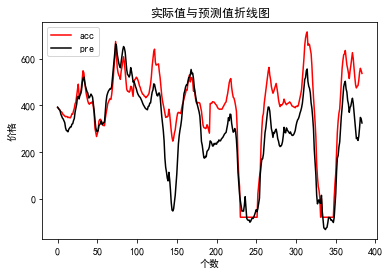

In [27]:
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei'] 
plt.rcParams['axes.unicode_minus'] = False
#acc 实际值数据
#pre 预测值数据
plt.plot(acc,color="r",label="acc") #颜色表示
plt.plot(pre,color=(0,0,0),label="pre")  
plt.xlabel("个数")  
plt.ylabel("价格")  
plt.title("实际值与预测值折线图") 
plt.legend()
plt.show() 

In [29]:
mape=np.abs((acc-pre)/((acc+pre)/2))
def average(maped):
    return float(sum(maped)/len(maped))
MAPE=average(mape)
print('mape:',MAPE)

mape: 0.4096248376259935
